# Visualize relationships between features

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def get_percentage(subset, total):
    return round(100.0 * subset / total, 2)

In [4]:
changesets = pd.read_csv('../data/visualize-relationships-between-features/changesets.csv')
changesets = changesets.drop_duplicates('ID')
print('Number of changesets: {}'.format(changesets.shape))
changesets.head(2)

Number of changesets: (59247, 19)


,ID,user,editor,Powerfull Editor,comment,source,imagery used,date,reasons,reasons__name,create,modify,delete,bbox,is suspect,harmful,checked,check_user__username,check date
0,47491144,RichRico,JOSM/1.5 (11639 en),True,Adding junction nodes or bridges to overlappin...,Bing,Not reported,2017-04-05T22:46:26+00:00,NaN,NaN,0.0,1.0,0.0,"SRID=4326;POLYGON ((-46.8202964 -23.693203, -4...",False,False,True,calfarome,2017-04-05T23:30:53.776282+00:00
1,47490912,Birgitta_fi,rosemary v0.4.4,False,Modified via wheelmap.org,Not reported,Not reported,2017-04-05T22:27:45+00:00,23.0,Major name modification,5.0,41.0,0.0,"SRID=4326;POLYGON ((24.9182827 60.1779368, 24....",False,True,True,yurasi,2017-04-05T23:33:08.813791+00:00


In [5]:
harmful_changesets = changesets[changesets['harmful'] == True]
print('Number of harmful changesets: {}'.format(harmful_changesets.shape[0]))

Number of harmful changesets: 5691


In [6]:
print('Percentage of changesets harmful: {}'.format(get_percentage(harmful_changesets.shape[0], changesets.shape[0])))

Percentage of changesets harmful: 9.61


In [7]:
features = ['create', 'modify', 'delete']
harmful_changesets[features].describe()

,create,modify,delete
count,5684.000000,5684.000000,5684.000000
mean,308.654469,42.622801,124.115060
std,3146.930499,666.165653,1340.028883
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,5.000000,1.000000,0.000000
max,50001.000000,31061.000000,47417.000000


In [8]:
# Is there any correlation among features?
harmful_changesets[features].corr()

,create,modify,delete
create,1.000000,-0.000616,0.017887
modify,-0.000616,1.000000,0.036237
delete,0.017887,0.036237,1.000000


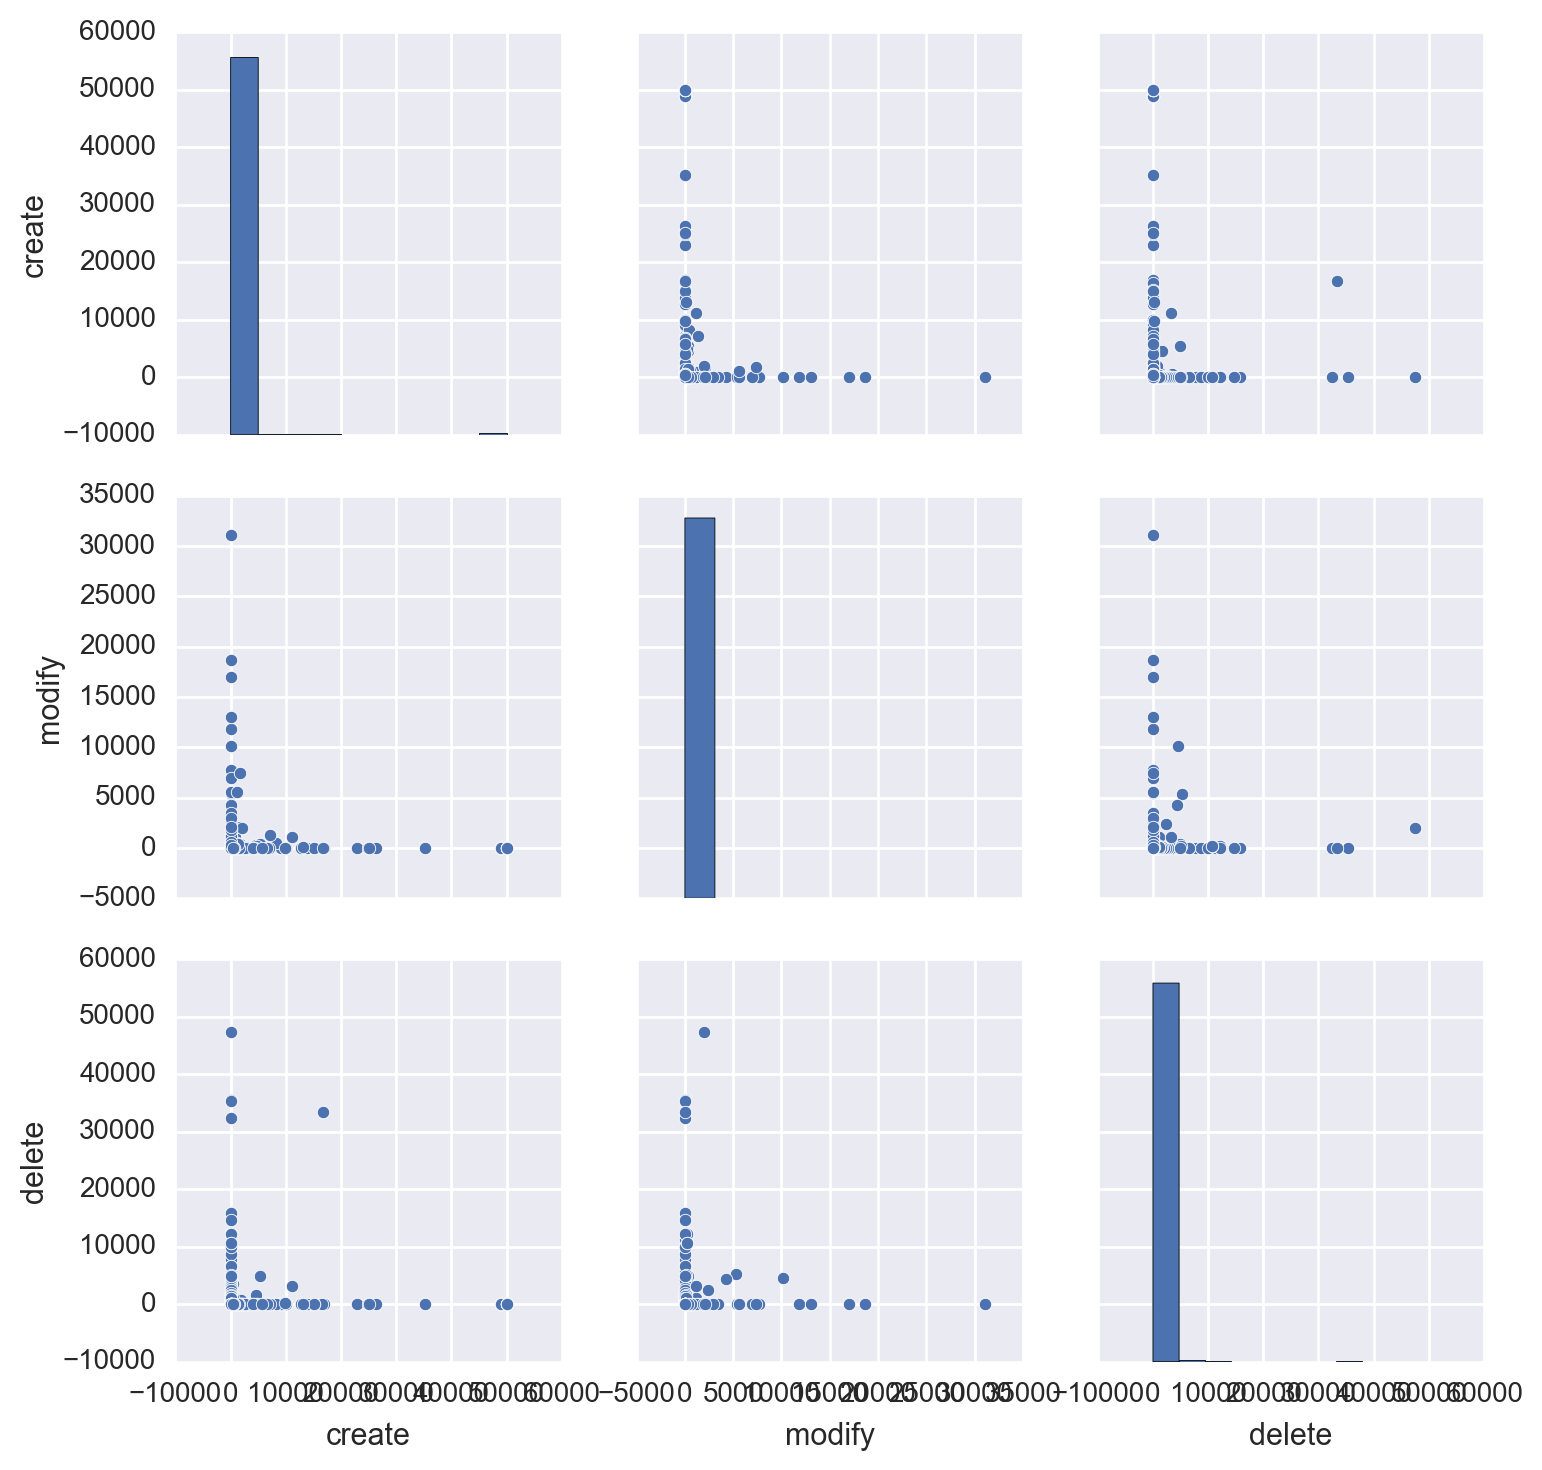

In [9]:
sns.pairplot(harmful_changesets[features].dropna())


## Relationship between features created and deleted
- Majority of changesets have a value of `0` for both features created and deleted.

In [10]:
harmful_changesets_count = harmful_changesets.shape[0]
print('Total harmful changesets: {}'.format(harmful_changesets_count))

create_zero_changesets = harmful_changesets[changesets['create'] == 0].drop_duplicates('ID')
create_zero_changesets_count = create_zero_changesets.shape[0]
print('Percentage of changests with "create=0": {}%'.format(get_percentage(create_zero_changesets_count, harmful_changesets_count)))

delete_zero_changesets = harmful_changesets[changesets['delete'] == 0].drop_duplicates('ID')
delete_zero_changesets_count = delete_zero_changesets.shape[0]
print('Percentage of changests with "delete=0": {}%'.format(get_percentage(delete_zero_changesets_count, harmful_changesets_count)))

create_delete_zero_changesets = harmful_changesets[(changesets['create'] == 0) & (changesets['delete'] == 0)].drop_duplicates('ID')
create_delete_zero_changesets_count = create_delete_zero_changesets.shape[0]
print('Percentage of changests with "create=0 & delete=0": {}%'.format(get_percentage(create_delete_zero_changesets_count, harmful_changesets_count)))

Total harmful changesets: 5691
Percentage of changests with "create=0": 51.8%
Percentage of changests with "delete=0": 82.52%
Percentage of changests with "create=0 & delete=0": 43.95%


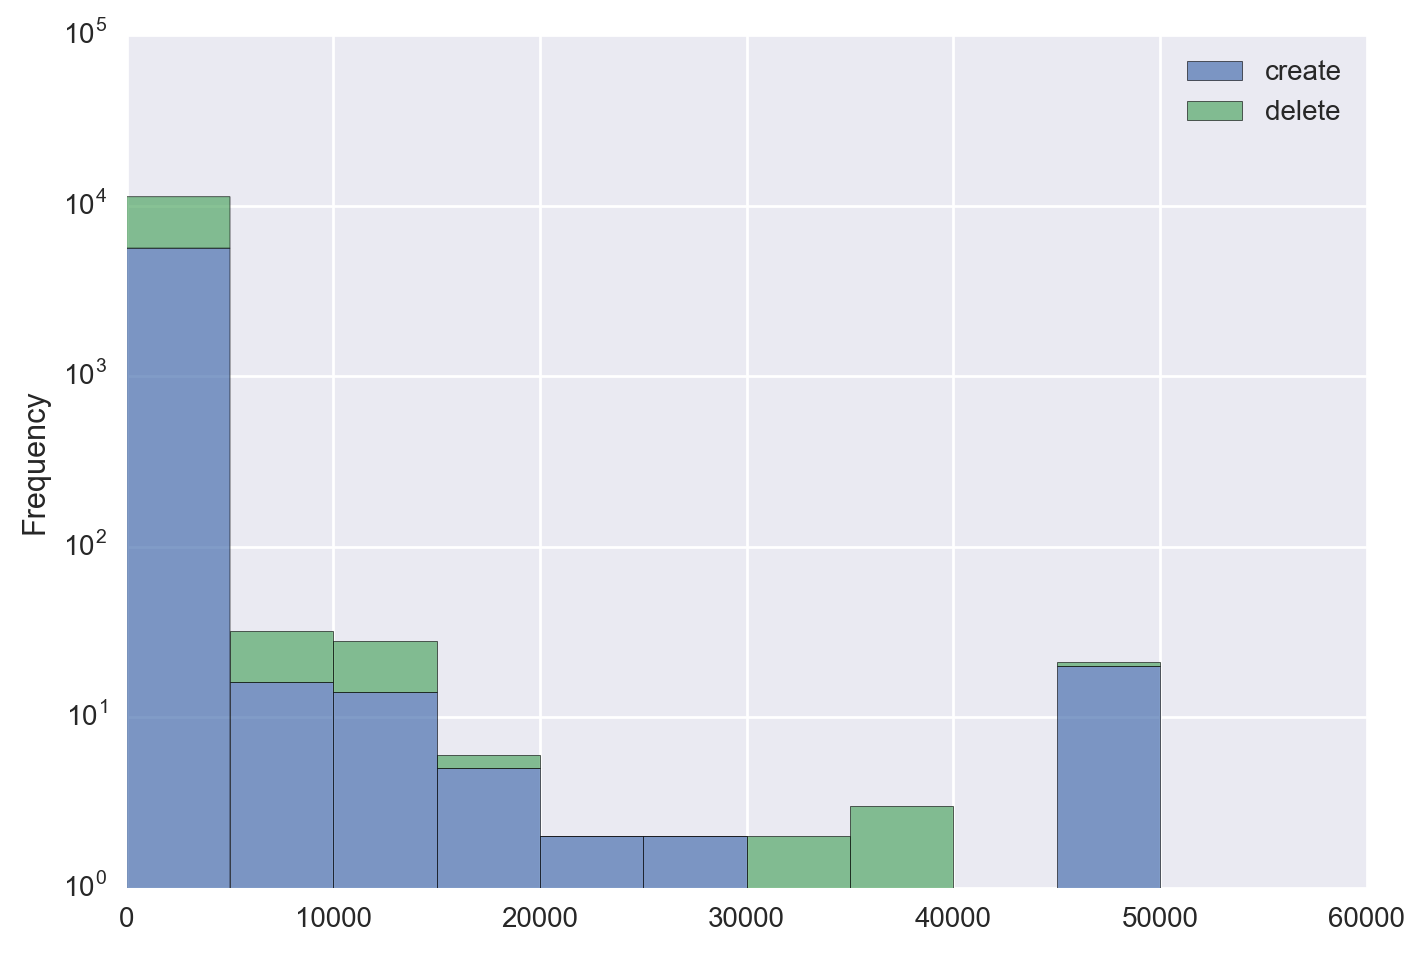

In [11]:
ax = harmful_changesets[['create', 'delete']].plot.hist(alpha=0.7, stacked=True)
ax.set_yscale('log')

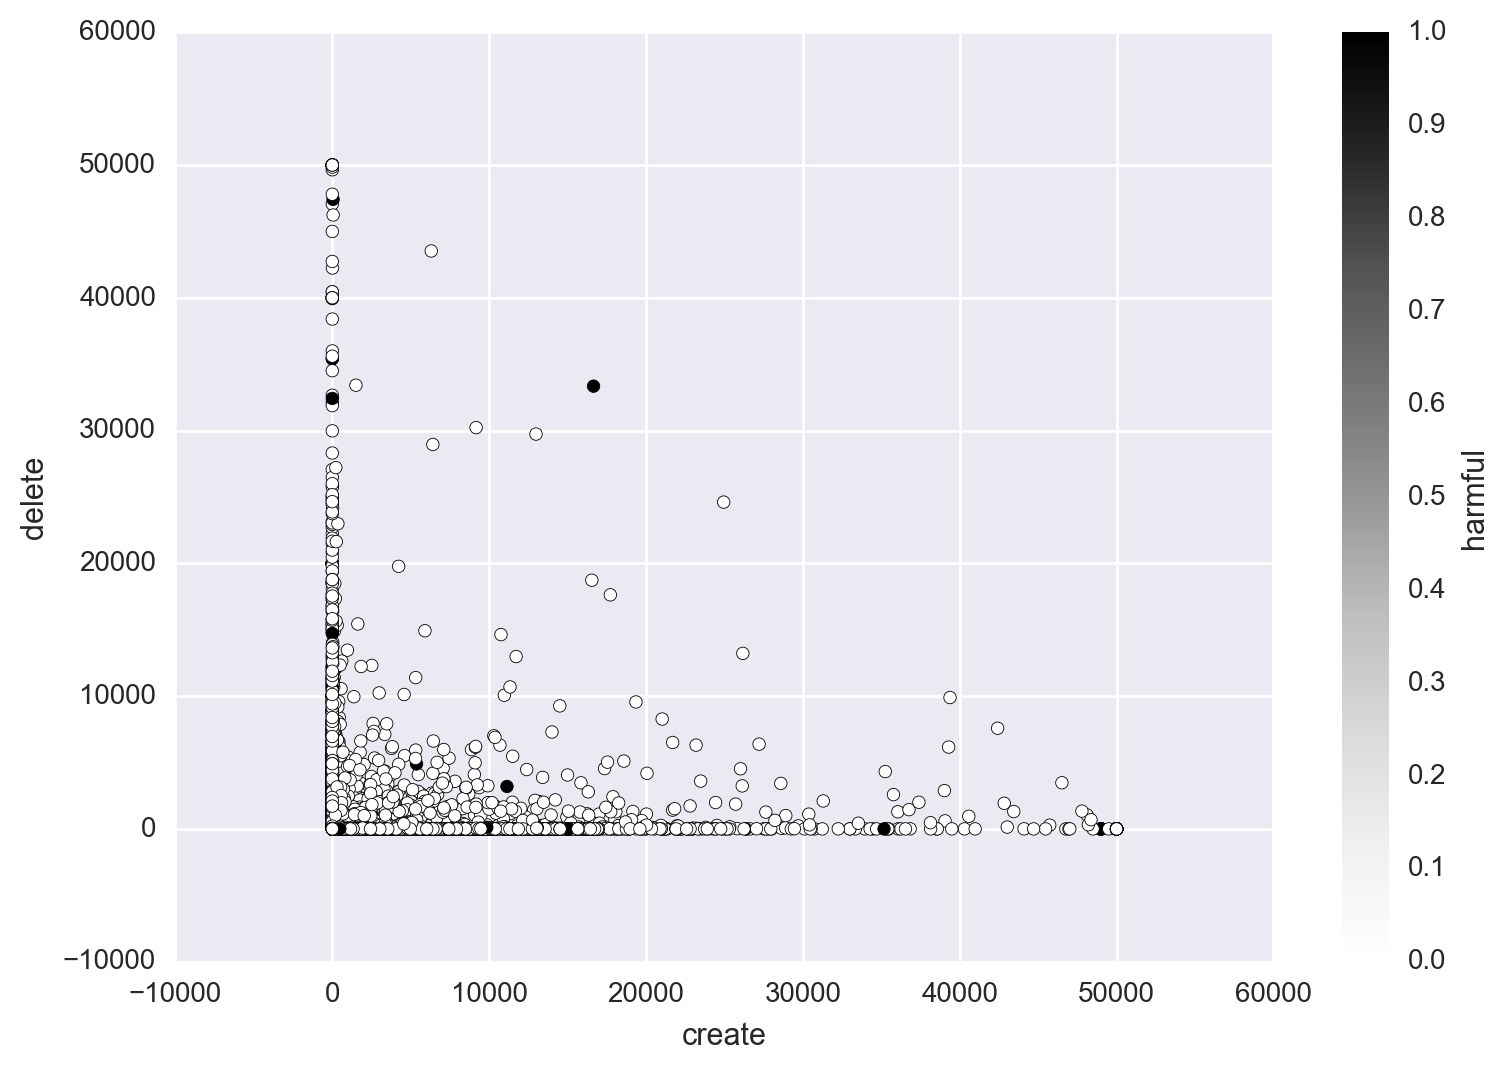

In [12]:
ax = changesets.plot.scatter(x='create', y='delete', c='harmful', sharex=False)
plt.tight_layout()

In [13]:
# What doe the outliers look like?
outliers = changesets[(changesets['create'] > 10000) & (changesets['delete'] > 10000)]
outliers.drop_duplicates('harmful')

,ID,user,editor,Powerfull Editor,comment,source,imagery used,date,reasons,reasons__name,create,modify,delete,bbox,is suspect,harmful,checked,check_user__username,check date
37092,44418251,TheSwavu,JOSM/1.5 (11223 en_AU),True,Refreshed boundaries for Morton NP,NSW LPI Base Map,Not reported,2016-12-15T09:26:14+00:00,3.0,mass deletion,11721.0,5.0,12982.0,"SRID=4326;POLYGON ((149.9164946 -35.4223113, 1...",True,False,True,ridixcr,2017-01-24T19:12:32.787202+00:00
64164,36566406,Mr UMM,JOSM/1.5 (9329 fr),True,Data for ENEO,survey,Not reported,2016-01-14T09:46:42+00:00,3.0,mass deletion,16654.0,0.0,33346.0,"SRID=4326;POLYGON ((10.4472305 4.9244159, 10.9...",True,True,True,nammala,2016-08-16T07:02:01.207145+00:00
